<a href="https://colab.research.google.com/github/ilmechaJu/TensorFlow-Examples/blob/master/ch01_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로우 (Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나

- 구글이 주도적으로 개발하는 플랫폼

- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원

- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)

- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

## 텐서플로우 아키텍쳐

<img src="https://developers.google.com/machine-learning/crash-course/images/TFHierarchy.svg">

<sub>출처: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit</sub>

## 텐서플로우 시작하기

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
print(tf.__version__)

2.5.0


### 텐서(Tensor)의 객체
- 타입(Type): `string`, `float32`, `float16`, `int32`, `int8` 등

- 형상(Shape): 0, 1, 2차원 등의 데이터 차원 

- 축(Rank): 차원의 개수

### 텐서의 차원과 연산

In [3]:
a = tf.constant(2)
print(tf.rank(a))
print(a)
# 기본 텐서 안에 shape, datatype 가 기본이다.

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [8]:
#랭크가 1이다. = 1차원이다.
b = tf.constant([2,3])
print(tf.rank(b))
print(b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [9]:
#랭크가 2이다. = 2차원이다.
c = tf.constant([[2,3],[6,7]])
print(tf.rank(c))
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)


In [10]:
d = tf.constant(['Hello'])
print(tf.rank(d))
print(d)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([b'Hello'], shape=(1,), dtype=string)


### 난수 생성

In [11]:
rand = tf.random.uniform([1],0,1)
print(rand.shape)
print(rand)

(1,)
tf.Tensor([0.46600544], shape=(1,), dtype=float32)


In [12]:
rand2 = tf.random.uniform([1],0,1)
print(rand.shape)
print(rand)

(1,)
tf.Tensor([0.46600544], shape=(1,), dtype=float32)


In [13]:
rand3 = tf.random.normal(shape=(3,2), mean =0, stddev=1)
print(rand3.shape)
print(rand3)

(3, 2)
tf.Tensor(
[[ 1.3995413  -0.26406384]
 [-0.22097345 -0.7112052 ]
 [-0.48081315 -1.2925457 ]], shape=(3, 2), dtype=float32)


### 즉시 실행 모드 (Eager Mode) 지원
- 즉시 실행모드를 통해 텐서플로우를 파이썬처럼 사용할 수 있음

- 1.x 버전에서는 '그래프'를 생성하고, 초기화 한 뒤에 세션을 통해 **값을 흐르게 하는 작업**을 진행해야함


In [14]:
a = tf.constant(3)
b = tf.constant(2)

In [15]:
print(tf.add(a,b))
print(a+b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [17]:
print(tf.subtract(a,b))
print(a-b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [19]:
print(tf.multiply(a,b))
print(a*b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


### 텐서 플로우 ↔ 넘파이
- `numpy()`
- `tf.convet_to_tensor()`

In [20]:
c = tf.add(a,b).numpy()
print(type(c))

<class 'numpy.int32'>


In [21]:
c_square = np.square(c, dtype=np.float32)
c_tensor = tf.convert_to_tensor(c_square)

print(c_tensor)
print(type(c_tensor))

tf.Tensor(25.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### 넘파이처럼 사용하기


In [22]:
t = tf.constant([[1.,2.,3.],[4.,5.,6.]])

print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


In [23]:
print(t[:,1:])

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [24]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [25]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [26]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [27]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### 타입 변환
- 텐서의 기본 dtype
  - float형 텐서: `float32`
  - int형 텐서: `int32`

- 연산시 텐서의 타입을 맞춰줘야 함
  - `float32` ~ `float32`
  - `int32` ~ `int32`
  - `flot32` ~ `int32` (x)

- 타입변환에는 `tf.cast()` 사용

In [28]:
a = tf.constant(2)
print(a)

b = tf.constant(2.)
print(b)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


tf.Tensor(34.0, shape=(), dtype=float32)


In [ ]:
t = tf.constant(30., dtype=tf.float64)
t2 = tf.constant(4.)

print(t2 + tf.cast(t, tf.float32))

### AutoGraph (오토그래프)

- Tensorflow가 작업을 좀 더 빠르게 동작하게 하기 위한 방법으로 Graph로 만들어 연산을 진행

- `tf.Graph`

- 유연성이 있음

  - 모바일 애플리케이션, 임베디드 기기, 백엔드 서버와 같이 Python 인터프리터가 없는 환경에서 Tensorflow 사용 가능 

In [32]:
import timeit #시간측정을 위한 임폴트

### @tf.function
- 자동으로 그래프를 생성(Auto Graph)

- 그래프로 변환하여 사용 -> GPU 연산 가능

- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능


- 원본 함수가 필요하다면 `(tf.function).python_function()`

In [33]:
 @tf.function
 def my_function(x):
   return x**2 -10*x + 3
   
print(my_function(2))
print(my_function(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [37]:
def my_function_(x):
   return x**2 -10*x + 3
   
print(my_function_(2)) #@tf.function 안쓰면 텐서형태로 return 안됨. -13 나옴
print(my_function_(tf.constant(2)))

-13
tf.Tensor(-13, shape=(), dtype=int32)


In [39]:
tf_my_func = tf.function(my_function_)

print(tf_my_func)
print(tf_my_func(2))

tf.Tensor(-13, shape=(), dtype=int32)


In [40]:
tf_my_func.python_function(2)

-13

In [41]:
def function_to_get_faster(x,y,b):
  x = tf.matmul(x,y)
  x = x + b 
  return x

a_function_that_uses_a_graph = tf.function(function_to_get_faster)

x1 = tf.constant([[1.0,2.0]])
y1 = tf.constant([[2.0],[3.0]])
b1 = tf.constant(4.0)

a_function_that_uses_a_graph(x1,y1,b1).numpy()

array([[12.]], dtype=float32)

텐서플로우가 `tf.function`으로 변환한 코드


 속도 향상


In [42]:
class SequentialModel(tf.keras.Model):
  def __init__(self, **kwargs):
    super(SequentialModel, self).__init__(**kwargs)
    self.flatten = tf.keras.layers.Flatten(input_shape=(28,28))
    self.dense_1 = tf.keras.layers.Dense(128, activation='relu')
    self.dropout = tf.keras.layers.Dropout(0.2)
    self.dense_2 = tf.keras.layers.Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.dropout(x)
    x = self.dense_2(x)
    return x

input_data = tf.random.uniform([60, 28, 28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model) #tf.function 쓴 graph 모델이 훨씬 빠르다. - 결론

print("Eager time:", timeit.timeit(lambda: eager_model(input_data), number=10000))
print("Graph time:", timeit.timeit(lambda: graph_model(input_data), number=10000))

Eager time: 9.969153023000217
Graph time: 5.361455238000417


### 변수 생성

- `tf.Variable`
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [49]:
X = tf.Variable(20.0)
print(X)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


### Autograd (자동 미분)

- `tf.GradientTape` API를 사용
- `tf.Variable` 같은 일부 입력에 대한 기울기 계산
  - 기본적으로 한번만 사용됨
- 변수가 포함된 연산만 기록

In [50]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

In [51]:
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [52]:
#일회용이기 때문에 두번째 사용은 오류남.
x2 = tf.Variable(4)
dy_dx = tape.gradient(y,x2)
dt_dx.numpy()

RuntimeError: ignored

In [53]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y_sq = y**2 
  z = x**2 + tf.stop_gradient(y_sq)

grad = tape.gradient(z, {'x':x, 'y':y})

print('dz/dx:', grad['x'])
print('dz/dy:', grad['y'])

dz/dx: tf.Tensor(4.0, shape=(), dtype=float32)
dz/dy: None


In [54]:
#<일회용 -> 영구지속>

weights = tf.Variable(tf.random.normal((3,2)), name='weights')
biases = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x=[[1.,2.,3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ weights + biases
  loss = tf.reduce_mean(y**2)

In [55]:
[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])

In [58]:
print(weights.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [60]:
weights2 = tf.Variable(tf.random.normal((3,2)), name='weights')
biases2 = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x2 = [[4.,5.,6.]]

[dl_dw2, dl_db2] = tape.gradient(loss, [weights2, biases2])

print(weights2.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [61]:
#사용하지 않을 때는 del로 삭제해줘야함!
#일회용인 이유는 자동미분은 오류 많이 발생시키기 때문!

del tape

## 간단한 신경망 구조 

### 뉴런
- 입력 → 연산 → 활성화함수 → 출력

In [62]:
def sigmoid(x):
  return (1 / (1+np.exp(-x)))

def Neuron(x,W,bias=0):
  z = x * W + bias
  return sigmoid(x)

In [65]:
x = tf.random.normal((1,2),0,1)
W = tf.random.normal((1,2),0,1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape: (1, 2)
W.shape: (1, 2)
tf.Tensor([[-0.2636824   0.28266725]], shape=(1, 2), dtype=float32)
tf.Tensor([[0.06571185 0.77721524]], shape=(1, 2), dtype=float32)
[[0.43445873 0.5702    ]]


In [66]:
x = tf.random.normal((2,1),0,1)
W = tf.random.normal((2,1),0,1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape: (2, 1)
W.shape: (2, 1)
tf.Tensor(
[[0.4453785]
 [1.4420427]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[-2.083756  ]
 [-0.16385923]], shape=(2, 1), dtype=float32)
[[0.60953987]
 [0.80877084]]


In [67]:
x = tf.random.normal((1,),0,1)
W = tf.random.normal((2,1),0,1)

print('x.shape:', x.shape)
print('W.shape:', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape: (1,)
W.shape: (2, 1)
tf.Tensor([0.33653468], shape=(1,), dtype=float32)
tf.Tensor(
[[ 1.3015734 ]
 [-0.23910359]], shape=(2, 1), dtype=float32)
[0.5833485]


### 퍼셉트론 학습 알고리즘 (가중치 업데이트)

## $\qquad w^{(next step)} = w + \eta \ (y - \tilde{y}) \ x$

- $w \ $: 가중치

- $\eta \ $ : 학습률

- $y \ $ : 정답 레이블

- $\tilde{y} \ $: 예측 레이블


In [73]:
x=1
y=0
W=tf.random.normal([1],0,1)
print(Neuron(x, W))
print('y:', y)

0.7310585786300049
y: 0


In [72]:
for i in range(1000): #i는 epoch수
  output = Neuron(x, W)
  error = y - output
  W = W + x * 0.1 * error

  if i % 100 == 99: #100개 단위로 끊어서 보자.
    print("{}\t{}\t{}".format(i+1, error, output)) # i+1은 epoch수

100	-0.7310585786300049	0.7310585786300049
200	-0.7310585786300049	0.7310585786300049
300	-0.7310585786300049	0.7310585786300049
400	-0.7310585786300049	0.7310585786300049
500	-0.7310585786300049	0.7310585786300049
600	-0.7310585786300049	0.7310585786300049
700	-0.7310585786300049	0.7310585786300049
800	-0.7310585786300049	0.7310585786300049
900	-0.7310585786300049	0.7310585786300049
1000	-0.7310585786300049	0.7310585786300049


In [76]:
def Neuron2(x, W, bias=0):
  z = tf.matmul(x, W, transpose_b=True) + bias
  return sigmoid(z)

In [77]:
x = tf.random.normal((1,3),0,1)
y = tf.ones(1)
W = tf.random.normal((1,3), 0, 1)

print(Neuron2(x, W))
print("y:", y)

[[0.85723305]]
y: tf.Tensor([1.], shape=(1,), dtype=float32)


In [78]:
for i in range(1000): #i는 epoch수
  output = Neuron2(x, W)
  error = y - output
  W = W + x * 0.1 * error

  if i % 100 == 99: #100개 단위로 끊어서 보자.
    print("{}\t{}\t{}".format(i+1, error, output)) # i+1은 epoch수

100	[[0.03380203]]	[[0.96619797]]
200	[[0.0187763]]	[[0.9812237]]
300	[[0.01296443]]	[[0.9870356]]
400	[[0.00989127]]	[[0.9901087]]
500	[[0.00799251]]	[[0.9920075]]
600	[[0.00670391]]	[[0.9932961]]
700	[[0.00577235]]	[[0.99422765]]
800	[[0.00506753]]	[[0.9949325]]
900	[[0.00451589]]	[[0.9954841]]
1000	[[0.00407249]]	[[0.9959275]]


In [83]:
#가중치 추가

x = tf.random.normal((1,3), 0, 1)
weights = tf.random.normal((1,3), 0, 1)
bias = tf.zeros((1,1))

y = tf.ones((1, ))

print("x\t: {}\nweights\t: {}\nbias\t: {}".format(x, weights, bias))

x	: [[-0.8736387  -0.04524216  0.74591875]]
weights	: [[-0.43125585 -0.3213564  -0.46628186]]
bias	: [[0.]]


In [85]:
for i in range(1000): #i는 epoch수
  output = Neuron2(x, weights, bias=bias)
  error = y - output
  weights = weights + x * 0.1 * error
  bias = bias + 1 * 0.1 * error

  if i % 100 == 99: #100개 단위로 끊어서 보자.
    print("{}\t{}\t{}".format(i+1, error, output)) # i+1은 epoch수

100	[[0.04485506]]	[[0.95514494]]
200	[[0.02228683]]	[[0.97771317]]
300	[[0.01476777]]	[[0.98523223]]
400	[[0.01102901]]	[[0.988971]]
500	[[0.00879622]]	[[0.9912038]]
600	[[0.00731325]]	[[0.99268675]]
700	[[0.00625724]]	[[0.99374276]]
800	[[0.00546718]]	[[0.9945328]]
900	[[0.00485379]]	[[0.9951462]]
1000	[[0.00436407]]	[[0.9956359]]


In [86]:
print("x\t: {}\nweights\t: {}\nbias\t: {}".format(x, weights, bias))

x	: [[-0.8736387  -0.04524216  0.74591875]]
weights	: [[-2.4585476 -0.4263415  1.2646329]]
bias	: [[2.3205135]]


### AND Gate

### OR Gate

### XOR Gate

In [91]:
X3 = np.array([[1, 1], [1, 0], [0,1], [0,0]])
Y3 = np.array([[0], [1], [1], [0]])
W3 = tf.random.normal([2], 0, 1)
b3 = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(X3[j] * W3) + b_x + b3)
    error = Y3[j][0] - output
    W3 = W3 + X3[j] * 0.1 * error
    b3 = b3 + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 0:
    print("Epoch {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t: {}".format(W3))
print("편향\t: {}".format(b3))

Epoch    0	Error Sum [-1.7569098]
Epoch  200	Error Sum [-0.00169164]
Epoch  400	Error Sum [-6.890297e-05]
Epoch  600	Error Sum [-3.1590462e-06]
Epoch  800	Error Sum [-1.013279e-06]
Epoch 1000	Error Sum [-1.013279e-06]
Epoch 1200	Error Sum [-1.013279e-06]
Epoch 1400	Error Sum [-1.013279e-06]
Epoch 1600	Error Sum [-1.013279e-06]
Epoch 1800	Error Sum [-1.013279e-06]

가중치	: [ 5.1279660e-02 -2.0712614e-06]
편향	: [-0.9999969]


In [92]:
for i in range(4):
  print("X: {} Y: {} Output: {}".format(X3[i], Y3[i], sigmoid(np.sum(X3[i] * W3) + b3)))

X: [1 1] Y: [0] Output: [0.27914244]
X: [1 0] Y: [1] Output: [0.2791429]
X: [0 1] Y: [1] Output: [0.2689416]
X: [0 0] Y: [0] Output: [0.26894203]


In [89]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(111) #랜덤 중복방지 #111개의 다른 씨앗

X4 = np.array([[1, 1], [1, 0], [0, 1], [0,0]])
Y4 = np.array([[0], [1], [1], [0]])

model = Sequential([Dense(units=2, activation='sigmoid', input_shape=(2, )),
                    Dense(units=1, activation='sigmoid')])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [95]:
history = model.fit(X4, Y4, epochs=2000, batch_size=1, verbose=0) #verbose=1이면 프로그래스바 나타냄. 0이면 x

In [96]:
model.predict(X4) #[0],[1],[1],[0] 에 가깝게 나오면 학습 good!

array([[0.05248936],
       [0.9487929 ],
       [0.9478103 ],
       [0.04209457]], dtype=float32)

## 시각화 사용

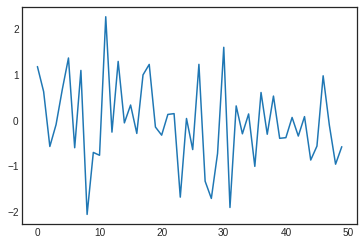

In [97]:
#1:32:41
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = range(50)
y = tf.random.normal([50],0,1)
plt.plot(x , y)

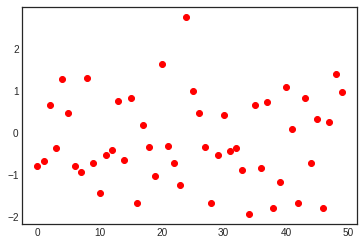

In [98]:
x = range(50)
y = tf.random.normal([50],0,1)
plt.plot(x , y, 'ro')

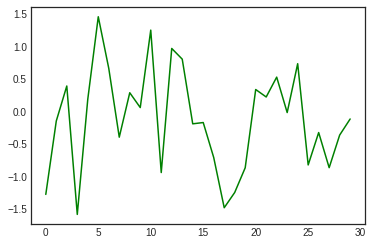

In [100]:
x = range(30)
y = tf.random.normal([30],0,1)
plt.plot(x , y, 'g-')

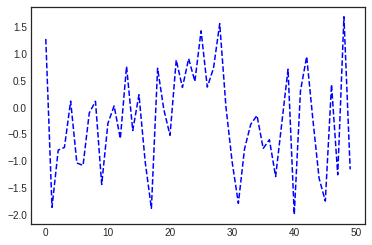

In [101]:
x = range(50)
y = tf.random.normal([50],0,1)
plt.plot(x , y, 'b--')

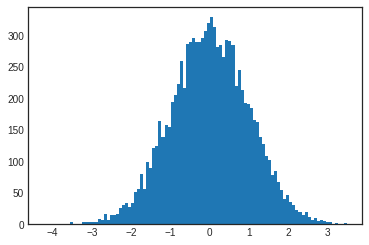

In [105]:
random_normal = tf.random.normal([10000], 0, 1)
plt.hist(random_normal, bins=100)
plt.show()

### XOR Gate의 'LOSS' 시각화


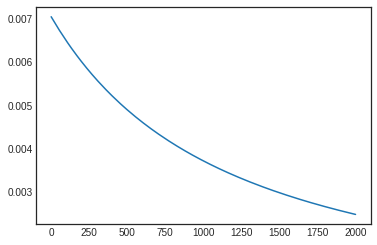

In [110]:
plt.plot(history.history['loss'])